In [1]:
import pandas as pd
import numpy as np
#pacote grafico
import matplotlib.pyplot as plt
import seaborn as sns
#Modelagem Estatistica
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor

In [ ]:
caminho = "base_funcionarios_v4.csv"
df = pd.read_csv(caminho, sep= ",", index_col= "id")
colunas = df.columns.drop("Possui_Skill_Dados")
print(colunas)
df.head()

Index(['Salario', 'Anos_Educ_Superior', 'Tempo_Empresa', 'Tempo_de_Carreira'], dtype='object')


,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados
id,,,,,
0,5517.4,3,3,9.777079,Não
1,6399.9,4,6,3.765998,Não
2,6206.7,6,3,7.926264,Não
3,6060.6,4,5,2.233497,Não
4,6122.7,2,9,26.821842,Não


In [3]:
df.describe()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira
count,46.000000,46.000000,46.000000,46.000000
mean,6969.797826,5.065217,10.326087,21.194106
std,1924.868873,2.839422,7.601328,15.869038
min,4139.500000,0.000000,0.000000,-3.235467
25%,5818.350000,4.000000,5.250000,9.621697
50%,6394.750000,5.000000,8.500000,17.689876
75%,7972.400000,6.000000,17.250000,29.773380
max,12118.100000,12.000000,27.000000,67.858714


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salario             46 non-null     float64
 1   Anos_Educ_Superior  46 non-null     int64  
 2   Tempo_Empresa       46 non-null     int64  
 3   Tempo_de_Carreira   46 non-null     float64
 4   Possui_Skill_Dados  46 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 2.2+ KB


In [5]:
df_modelo1 = df[colunas]
print(df_modelo1)

    Salario  Anos_Educ_Superior  Tempo_Empresa  Tempo_de_Carreira
id                                                               
0    5517.4                   3              3           9.777079
1    6399.9                   4              6           3.765998
2    6206.7                   6              3           7.926264
3    6060.6                   4              5           2.233497
4    6122.7                   2              9          26.821842
5    6955.0                   5              9          21.405828
6    7643.0                   4              6          10.781766
7    6210.2                   2              8          10.424700
8    5761.0                   9             15          28.089606
9    8086.9                   6             14          21.113964
10   6375.4                   4              9          21.226313
11   9568.8                   6             20          34.470081
12   9316.0                   6             25          49.242385
13   6822.

In [6]:
df_modelo1.corr().round(2)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira
Salario,1.00,0.78,0.77,0.71
Anos_Educ_Superior,0.78,1.00,0.61,0.61
Tempo_Empresa,0.77,0.61,1.00,0.94
Tempo_de_Carreira,0.71,0.61,0.94,1.00


<Axes: >

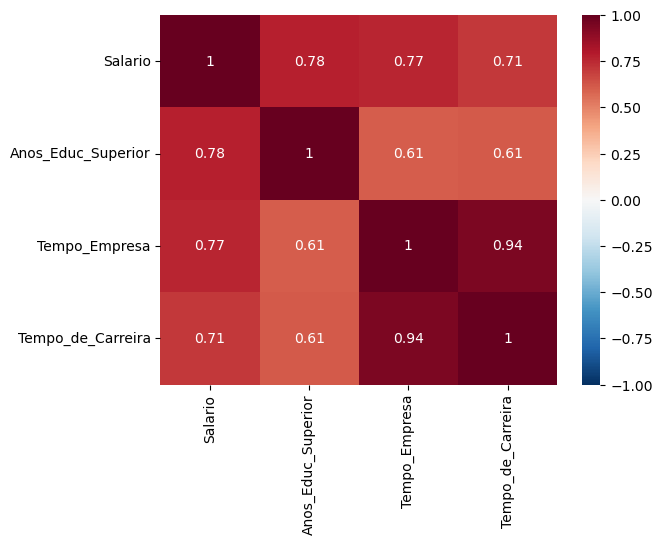

In [7]:
sns.heatmap(data= df_modelo1.corr(), 
            vmin= -1, 
            vmax= 1,
            annot= True, 
            cmap= "RdBu_r",
            )

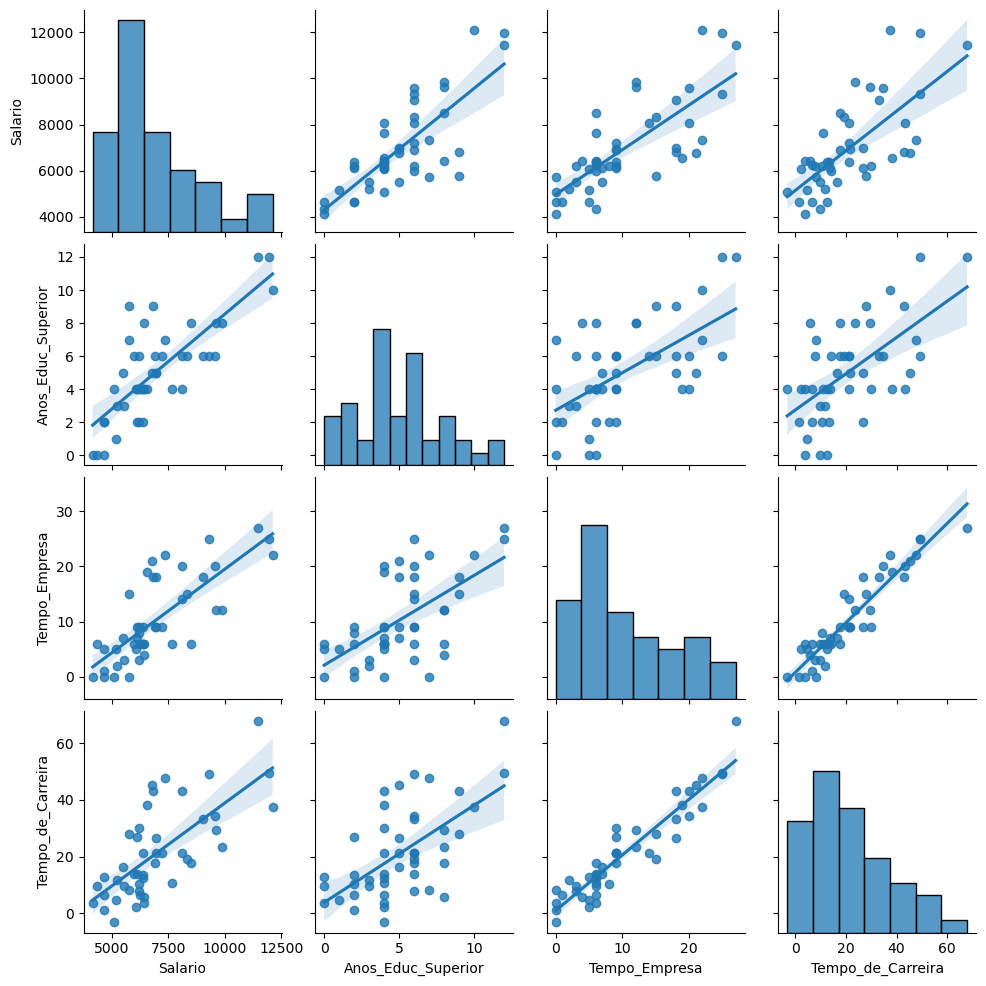

In [8]:
sns.pairplot(df, kind= 'reg')

In [9]:
y = df_modelo1.Salario  #quem eu quero responder

#Setar o X
df_modelo1["Interceptor"] = 1
x = df_modelo1[["Interceptor","Anos_Educ_Superior","Tempo_Empresa", "Tempo_de_Carreira"]]

In [10]:
modelo_regressiva = sm.OLS(y,x)
resultado = modelo_regressiva.fit()

In [11]:
print(resultado.summary())


                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     41.61
Date:                Mon, 02 Feb 2026   Prob (F-statistic):           1.21e-12
Time:                        13:51:41   Log-Likelihood:                -380.92
No. Observations:                  46   AIC:                             769.8
Df Residuals:                      42   BIC:                             777.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Interceptor         4053.7618    308

Interessante como esse modelo demonstra que o tempo de Carreira na verdade diminui o salário base, sendo assim este estudo demonstra 
que esta base de dados nao é adequada para o estudo

O valor de P > |t| sendo diferente de 0 em alguns coeficientes (principalmente em Tempo de Carreira) 
tambem demonstram a falta de coerencia dos dados